In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

In [2]:
survey_df = pd.read_csv('survey_results_public.csv')
survey_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [4]:
#total of all missing values
total_missing = survey_df.isnull().sum()

#percentage of missing values = null values/non-missing values * 100
percentage = survey_df.isnull().sum()/survey_df.count()*100

#rounding off the percent to one decimal place
rounded_percentage = round(percentage,1)

#concatenate the total missing and percentage missing into one df
missing_data = pd.concat([total_missing, rounded_percentage],axis = 1, keys=['Total','%'])
missing_data[:10]

,Total,%
Respondent,0,0.0
MainBranch,299,0.5
Hobbyist,45,0.1
Age,19015,41.8
Age1stCode,6561,11.3
CompFreq,24392,60.9
CompTotal,29635,85.1
ConvertedComp,29705,85.5
Country,389,0.6
CurrencyDesc,18989,41.8


In [5]:
num_respondents = len(survey_df['Respondent'])
print(f'Total number of participants is {num_respondents}')

Total number of participants is 64461


In [6]:
countries = survey_df['Country'].value_counts()
countries[:10]

United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
France             1898
Brazil             1818
Netherlands        1343
Poland             1278
Australia          1208
Name: Country, dtype: int64

In [7]:
kenyan_developers = survey_df['Country'].value_counts()['Kenya']
print(f'The number of respondents from Kenya are {kenyan_developers}')

The number of respondents from Kenya are 271


In [8]:
kenya_average_age = round(survey_df[survey_df['Country'] == 'Kenya']['Age'].mean())
print(f'The average age of the Kenyan coder is {kenya_average_age} years')

The average age of the Kenyan coder is 26.0 years


In [9]:
employment_status = survey_df[survey_df['Country']=='Kenya']['Employment']
employment_status.value_counts()

Student                                                 83
Employed full-time                                      78
Independent contractor, freelancer, or self-employed    50
Not employed, but looking for work                      38
Employed part-time                                      18
Not employed, and not looking for work                   4
Name: Employment, dtype: int64

In [10]:
gender = survey_df[survey_df['Country'] == 'Kenya']['Gender']
gender.value_counts()

Man                                                      192
Woman                                                     14
Man;Non-binary, genderqueer, or gender non-conforming      2
Woman;Man                                                  1
Name: Gender, dtype: int64

In [11]:
majors = survey_df[survey_df['Country']=='Kenya']['UndergradMajor']
majors.value_counts()

Computer science, computer engineering, or software engineering                 100
Information systems, information technology, or system administration            43
Another engineering discipline (such as civil, electrical, mechanical, etc.)     16
Web development or web design                                                    10
Mathematics or statistics                                                        10
A business discipline (such as accounting, finance, marketing, etc.)              9
I never declared a major                                                          3
A social science (such as anthropology, psychology, political science, etc.)      3
A natural science (such as biology, chemistry, physics, etc.)                     2
A humanities discipline (such as literature, history, philosophy, etc.)           1
A health science (such as nursing, pharmacy, radiology, etc.)                     1
Name: UndergradMajor, dtype: int64

In [12]:
respondents = len(survey_df['Respondent'])
countries = survey_df['Country'].nunique()
print(f'The total number of developers that took part in the survey are: {respondents} from {countries} countries')

The total number of developers that took part in the survey are: 64461 from 183 countries


In [13]:
# absolute number of Kenyan developers 
kenyan_respondents = survey_df['Country'].value_counts()['Kenya']
print(f"The total number of respondents who are Kenyan are {kenyan_respondents} with {len(survey_df[(survey_df['Country']=='Kenya')&(survey_df['Gender']=='Man')])} of them being male and {len(survey_df[(survey_df['Country']=='Kenya')&(survey_df['Gender']=='Woman')])} being female.")

# percentage of African developers and percentage of all developers
print(f"Kenyan developers make up {round((kenyan_respondents/2709)*100,2)} percent of the African respondents and {round((kenyan_respondents/respondents)*100,2)} percent of all respondents.")

The total number of respondents who are Kenyan are 271 with 192 of them being male and 14 being female.
Kenyan developers make up 10.0 percent of the African respondents and 0.42 percent of all respondents.


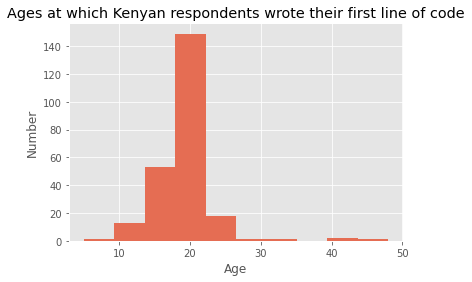

In [14]:
#replace "younger than 5" and "older than 85" with nan
survey_df['Age1stCode'].replace('Younger than 5 years', np.nan, inplace = True)
survey_df['Age1stCode'].replace('Older than 85', np.nan, inplace = True)
survey_df['Age1stCode'] = survey_df['Age1stCode'].astype(float)

#The age at which Kenyan developers wrote their first code
kenyan_developers = survey_df[survey_df['Country']== "Kenya"]
kenyan_ages = kenyan_developers['Age1stCode']
          
kenyan_ages.plot.hist(bins= 10,color='#e56d53')
plt.title('Ages at which Kenyan respondents wrote their first line of code')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

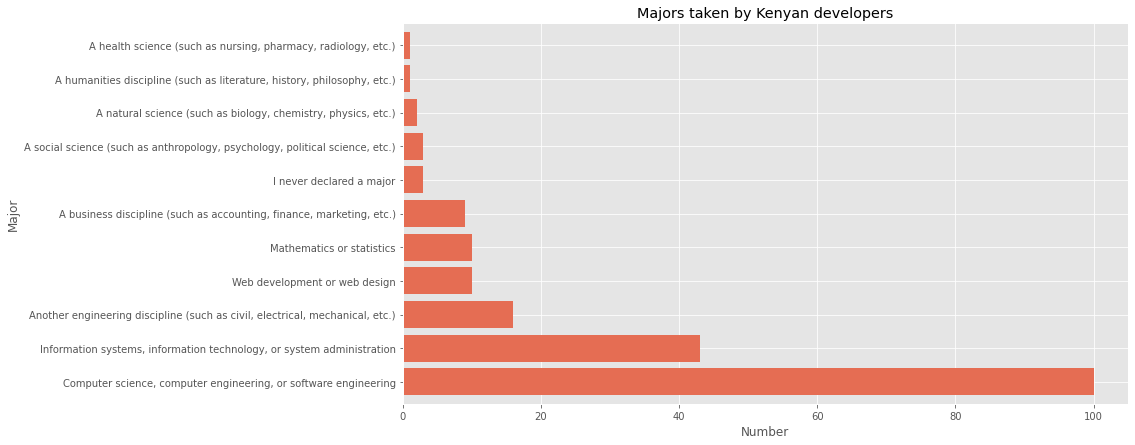

In [15]:
#majors of Kenyan developers
kenyan_developers = survey_df[survey_df['Country']== "Kenya"]

plt.subplots(figsize = (13,7))
ax = kenyan_developers['UndergradMajor'].value_counts().plot.barh(width=0.8, color = '#e56d53')

plt.xlabel('Number')
plt.ylabel('Major')
plt.title('Majors taken by Kenyan developers')
plt.show()

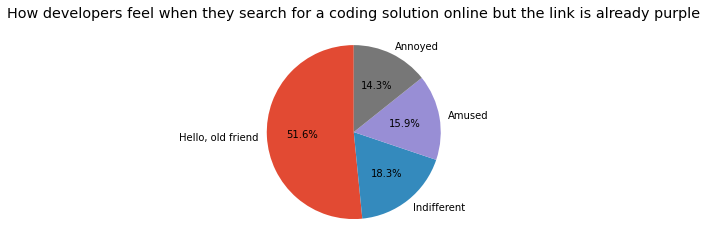

In [16]:
#How do you feel when you see a purple link visualization
plt.pie(
    survey_df['NEWPurpleLink'].value_counts(),
    labels= survey_df['NEWPurpleLink'].value_counts().index.tolist(),
    shadow=False,
    startangle=90,
    autopct='%1.1f%%',
    )
plt.title('How developers feel when they search for a coding solution online but the link is already purple')
plt.show()
